In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.mixture import GaussianMixture
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from numpy import quantile, where, random
from scipy import ndimage
import matplotlib as mpl
from scipy import linalg
import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Retrieve and load the Olivetti faces dataset
dataset = datasets.fetch_olivetti_faces()

# Intial data exploration

In [3]:
dataset.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

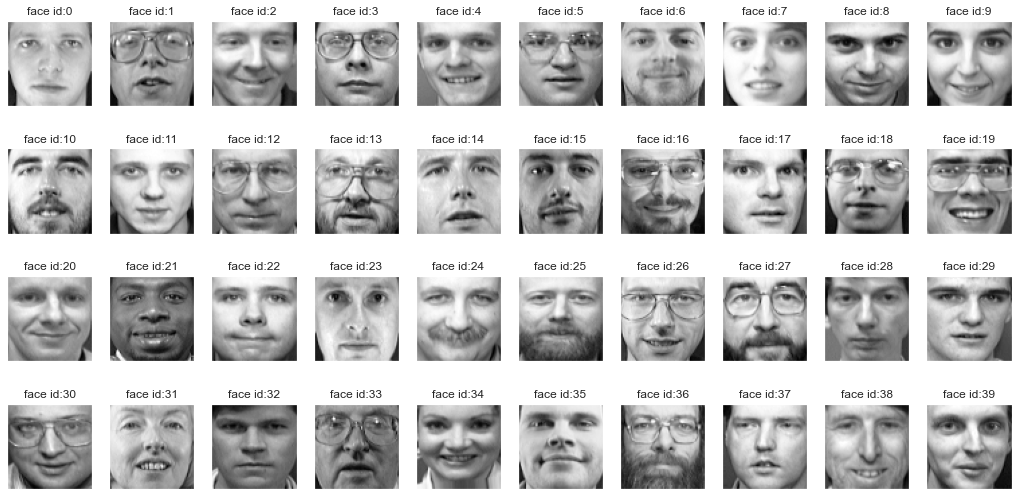

In [4]:
# Vizualizing the dataset
# plot a sample image for each of the 40 classes

images = dataset.images 

fig = plt.figure(figsize=(18,9)) 

for unique_id in range(40): 
    image_index = unique_id*10
    img_grid = fig.add_subplot(4, 10,  unique_id+1)
    img_grid.imshow(images[image_index], cmap='gray')
    img_grid.set_xticks([])
    img_grid.set_yticks([])
    img_grid.set_title("face id:{}".format(unique_id))

plt.show()

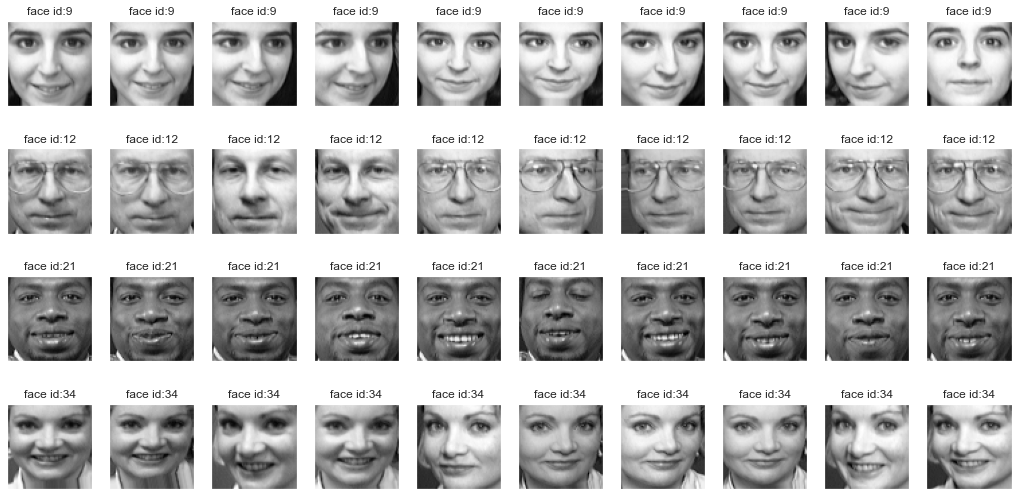

In [5]:
# plot all the 10 faces for 4 classes

fig = plt.figure(figsize=(18,9)) 
spec = fig.add_gridspec(ncols=10, nrows=4)

for i, class_id in enumerate([9, 12, 21, 34]): 
    for j in range(10):
        image_index = class_id*10 + j 
        img_grid = fig.add_subplot(spec[i, j])
        img_grid.imshow(images[image_index], cmap='gray')
        img_grid.set_xticks([])
        img_grid.set_yticks([])
        img_grid.set_title("face id:{}".format(class_id))

plt.show()

In [6]:
target = dataset.target
data = dataset.images.reshape(len(dataset.images),-1)

In [7]:
target.shape

(400,)

In [8]:
data.shape

(400, 4096)

In [9]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(dataset.images.shape[1], dataset.images.shape[2]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64


In [10]:
#Use PCA preserving 99% of the variance to reduce the dataset’s dimensionality.
pca = PCA(0.99)
pca.fit(data)
X = pca.transform(data)

print(pca.explained_variance_ratio_.sum())

0.99000555


In [11]:
X.shape

(400, 260)

In [12]:
#Determine the most suitable covariance_type for the dataset.
gm_spherical= GaussianMixture(n_components=10, random_state=42, covariance_type="spherical").fit(X)
print("Mean Value of Gaussian Mixture : ",gm_spherical.means_)
print("*******************************************************************************************")
cluster_spherical = gm_spherical.predict(X)
print("cluster are:",cluster_spherical)
print("*******************************************************************************************")
print("Mean Silhouette score is :" ,silhouette_score(X, cluster_spherical))
print("*******************************************************************************************")
print("Covariances Values of Gaussian Mixture : ",gm_spherical.covariances_)

Mean Value of Gaussian Mixture :  [[-2.68004165e+00 -4.88830459e+00 -2.84433188e+00 ... -6.88271038e-03
   4.57969625e-03  2.64745060e-02]
 [ 8.73564534e+00 -4.41750903e-01 -3.54713538e+00 ...  3.69429588e-03
   1.47595070e-03 -6.78858720e-03]
 [ 2.16445590e+00 -7.44408934e-02  5.65892038e-01 ... -1.82677186e-03
  -1.17969822e-02 -1.01189598e-03]
 ...
 [-8.39369155e-01 -3.22248508e+00  1.67507395e+00 ... -5.93794816e-03
   3.77931746e-03  1.42397132e-03]
 [-6.81907092e-01 -2.52719125e+00 -3.12445194e+00 ...  9.54522144e-03
  -1.73016824e-03 -3.38893020e-03]
 [-1.13410287e+00  6.11460944e+00 -2.65364589e+00 ... -2.15955191e-02
   3.76869408e-03  5.76250004e-03]]
*******************************************************************************************
cluster are: [4 7 4 9 7 5 4 5 4 7 8 8 8 8 8 8 8 8 8 8 2 2 7 3 5 3 5 5 7 7 5 7 5 4 7 5 4
 5 8 7 2 2 2 2 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 8 4 5 4 4 4 4 4 4 7 7 4 7
 4 4 7 4 5 7 2 2 2 5 5 5 5 5 2 2 7 7 7 7 7 7 7 7 5 4 0 0 0 0 0 0 0 0 0 0 5


In [13]:
#Determine the most suitable covariance_type for the dataset.
gm_tied = GaussianMixture(n_components=10, random_state=42, covariance_type="tied").fit(X)
print("Mean Value of Gaussian Mixture : ",gm_tied.means_)
print("*******************************************************************************************")
cluster_tied = gm_tied.predict(X)
print("cluster are:",cluster_tied)
print("*******************************************************************************************")
print("Mean Silhouette score is :" ,silhouette_score(X, cluster_tied))
print("*******************************************************************************************")
print("Covariances Values of Gaussian Mixture : ",gm_tied.covariances_)

Mean Value of Gaussian Mixture :  [[-2.82498620e+00 -4.89193030e+00 -2.76665054e+00 ... -2.00541856e-02
   1.15292860e-02  2.84268731e-02]
 [ 8.29271052e+00 -5.22917895e-01 -3.71775634e+00 ... -1.54252716e-02
   4.50081649e-03 -7.85440782e-03]
 [ 2.31466737e+00 -3.18512626e-01  2.05852689e-02 ... -1.97365340e-04
  -8.67320065e-03 -3.58949907e-03]
 ...
 [-8.66010118e-01 -3.10839171e+00  1.80118466e+00 ... -4.55998677e-03
   2.31851928e-03  1.82340639e-03]
 [-1.32968763e+00 -2.69358965e+00 -2.89473088e+00 ...  1.57157144e-02
  -5.53824701e-03 -1.01958395e-03]
 [-1.13179841e+00  6.11431206e+00 -2.65475247e+00 ... -2.15273148e-02
   3.78439533e-03  5.65188200e-03]]
*******************************************************************************************
cluster are: [4 7 4 9 7 5 4 5 4 7 8 8 8 8 8 8 8 8 8 8 2 2 2 5 5 3 5 5 7 7 5 7 5 4 7 5 4
 5 8 7 2 2 2 2 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 8 4 5 4 4 4 4 4 4 0 7 4 7
 4 4 7 4 5 7 2 2 2 5 5 5 5 5 2 7 7 7 7 7 7 7 7 7 5 4 0 0 0 0 0 0 0 0 0 0 5


In [14]:
#Determine the most suitable covariance_type for the dataset.
gm_diag = GaussianMixture(n_components=10, random_state=42, covariance_type="diag").fit(X)
print("Mean Value of Gaussian Mixture : ",gm_diag.means_)
print("*******************************************************************************************")
cluster_diag = gm_diag.predict(X)
print("cluster are:",cluster_diag)
print("*******************************************************************************************")
print("Mean Silhouette score is :" ,silhouette_score(X, cluster_diag))
print("*******************************************************************************************")
print("Covariances Values of Gaussian Mixture : ",gm_diag.covariances_)

Mean Value of Gaussian Mixture :  [[-2.82480142e+00 -4.89192568e+00 -2.76674956e+00 ... -2.00373946e-02
   1.15204266e-02  2.84243842e-02]
 [ 8.73564534e+00 -4.41750903e-01 -3.54713538e+00 ...  3.69429588e-03
   1.47595070e-03 -6.78858720e-03]
 [ 4.08810128e-01 -2.78936211e-01  7.12065726e-01 ...  3.64651782e-03
  -1.50916533e-02  6.61713406e-04]
 ...
 [-1.63838603e-01 -2.66304064e+00  8.73232646e-01 ... -1.12795659e-02
   4.64544095e-03 -1.57625998e-02]
 [-7.98801841e-01 -2.17846435e+00 -2.28893374e+00 ...  1.23569460e-02
  -9.02170430e-03  7.42124072e-03]
 [-1.13203007e+00  6.11438187e+00 -2.65456403e+00 ... -2.15373712e-02
   3.80057138e-03  5.67679174e-03]]
*******************************************************************************************
cluster are: [4 7 4 9 7 5 4 5 4 7 8 8 8 8 8 8 8 7 8 7 2 2 2 2 5 3 5 5 7 7 5 7 8 2 2 5 4
 5 8 7 2 2 2 2 2 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 8 4 8 4 4 8 4 4 8 0 2 4 7
 4 4 7 4 5 7 2 2 2 2 5 5 5 2 2 7 7 2 7 7 7 7 7 7 5 4 0 0 0 0 0 0 0 0 0 0 5


In [15]:
#Determine the most suitable covariance_type for the dataset.
gm_full = GaussianMixture(n_components=10, random_state=42, covariance_type="full").fit(X)
print("Mean Value of Gaussian Mixture : ",gm_full.means_)
print("*******************************************************************************************")
cluster_full = gm_full.predict(X)
print("cluster are:",cluster_full)
print("*******************************************************************************************")
print("Mean Silhouette score is :" ,silhouette_score(X, cluster_full))
print("*******************************************************************************************")
print("Covariances Values of Gaussian Mixture : ",gm_full.covariances_)

Mean Value of Gaussian Mixture :  [[-2.82498620e+00 -4.89193030e+00 -2.76665054e+00 ... -2.00541856e-02
   1.15292860e-02  2.84268731e-02]
 [ 8.29271052e+00 -5.22917895e-01 -3.71775634e+00 ... -1.54252716e-02
   4.50081649e-03 -7.85440782e-03]
 [ 2.31466737e+00 -3.18512627e-01  2.05852688e-02 ... -1.97365328e-04
  -8.67320069e-03 -3.58949906e-03]
 ...
 [-9.01089478e-01 -3.09214974e+00  1.77361120e+00 ... -7.00004944e-03
   7.92158809e-04  1.54255039e-03]
 [-1.32968763e+00 -2.69358965e+00 -2.89473088e+00 ...  1.57157144e-02
  -5.53824701e-03 -1.01958395e-03]
 [-1.13179841e+00  6.11431206e+00 -2.65475247e+00 ... -2.15273148e-02
   3.78439533e-03  5.65188200e-03]]
*******************************************************************************************
cluster are: [4 7 4 9 7 5 4 5 4 7 8 8 8 8 8 8 8 8 8 8 2 2 2 3 5 3 5 5 7 7 5 7 5 4 7 5 4
 5 8 7 2 2 2 2 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 8 4 5 4 4 4 4 4 4 0 7 4 7
 4 4 7 4 5 7 2 2 2 5 5 5 5 5 2 7 7 7 7 7 7 7 7 7 5 4 0 0 0 0 0 0 0 0 0 0 5


In [16]:
#Determine the most suitable covariance_type for the dataset.
#Determine the minimum number of clusters that best represent the dataset using either AIC or BIC
#Using aic

min_aic = np.infty

for num in range(1, 11):
    for covariance_type in ("spherical", "tied", "diag", "full"):
        aic = GaussianMixture(n_components = num, n_init = 10,
                              covariance_type = covariance_type,
                              random_state=42).fit(X).aic(X)
        if aic < min_aic:
            min_aic = aic
            best_k = num
            best_covariance_type = covariance_type


print("Best K value: ", best_k)
print("Suitable Covariance Type : ", best_covariance_type)

Best K value:  5
Suitable Covariance Type :  full


In [17]:
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
gmm.fit(X)
print("Converged  Gaussian Mixture : ", gmm.converged_)

Converged  Gaussian Mixture :  True


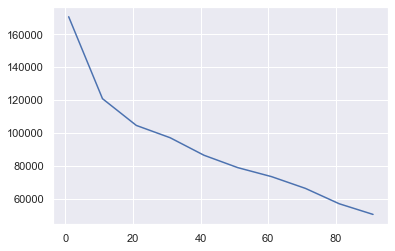

In [18]:
#Plot the results from (2) and (3)
#covariance_type='spherical'
n_components = np.arange(1,100, 10)
models_spherical = []
aic_spherical = []
for n in n_components:
    model = GaussianMixture(n, covariance_type='spherical', random_state=42)
    aic = model.fit(X).aic(X)
    models_spherical.append(model)
    aic_spherical.append(aic) 
    
    
plt.plot(n_components, aic_spherical)

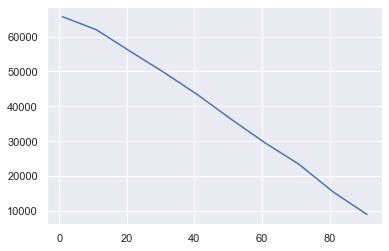

In [19]:
#covariance_type='tied'
n_components = np.arange(1,100, 10)
models_tied = []
aic_tied = []
for n in n_components:
    model = GaussianMixture(n, covariance_type='tied', random_state=42)
    aic = model.fit(X).aic(X)
    models_tied.append(model)
    aic_tied.append(aic) 
    
    
plt.plot(n_components, aic_tied)

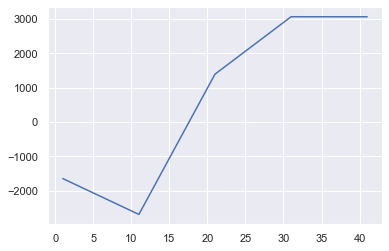

In [20]:
#covariance_type='diag'
n_components = np.arange(1,50, 10)
models_diag = []
aic_diag = []
for n in n_components:
    model = GaussianMixture(n, covariance_type='diag', random_state=42)
    aic = model.fit(X).aic(X)
    models_diag.append(model)
    aic_diag.append(aic) 
    
    
plt.plot(n_components, aic_diag)

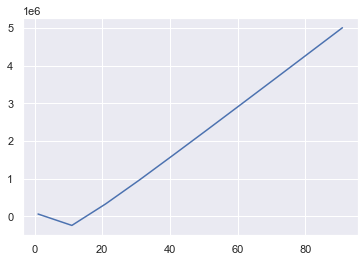

In [21]:
#covariance_type='full'
n_components = np.arange(1,100, 10)
models_full = []
aic_full = []
for n in n_components:
    model = GaussianMixture(n, covariance_type='full', random_state=42)
    aic = model.fit(X).aic(X)
    models_full.append(model)
    aic_full.append(aic) 
    
    
plt.plot(n_components, aic_full)

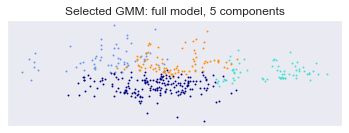

In [22]:
splot = plt.subplot(2, 1, 2)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
Y_ = gmm.predict(X)
for i, (mean, cov, color) in enumerate(zip(gmm.means_, gmm.covariances_, color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi  # convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title(
    f"Selected GMM: {gmm.covariance_type} model, "
    f"{gmm.n_components} components"
)
plt.subplots_adjust(hspace=0.35, bottom=0.02)
plt.show()

In [23]:
#Output the hard clustering for each instance. 
gmm_hard = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
gmm_hard.fit(X)
gmm_hard.predict(X)

array([0, 4, 0, 2, 4, 2, 0, 2, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4,
       4, 3, 3, 3, 3, 3, 4, 4, 3, 4, 3, 0, 0, 2, 2, 3, 0, 0, 3, 4, 4, 3,
       2, 2, 3, 3, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 0, 4, 0, 0, 4, 0, 2, 4, 4, 4, 4, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 3, 4, 4, 2, 4, 4, 4, 4, 3, 4, 2, 3, 3, 4, 3, 3, 4, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 3, 0, 0, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 3, 3, 4, 4, 3, 2, 2, 3, 2, 2, 0, 0, 2, 4, 2, 2,
       0, 2, 0, 2, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 2, 3, 2, 2,
       2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 4, 4, 3, 4, 3, 4, 4, 2, 2, 0, 0, 3, 3, 4, 2, 2, 2, 3, 3, 4, 4,
       4, 4, 3, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 0, 4, 4, 4, 4, 4, 4, 4,
       0, 4, 4, 4, 4, 0, 4, 4, 0, 0, 4, 4, 4, 4, 4, 3, 1, 1, 1, 3, 3, 3,
       3, 3, 1, 1, 4, 1, 4, 1, 1, 3, 1, 1, 3, 4, 3,

In [24]:
#Output the soft clustering for each instance
gmm_soft = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
gmm_soft.fit(X)
gmm_soft.predict_proba(X)

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])

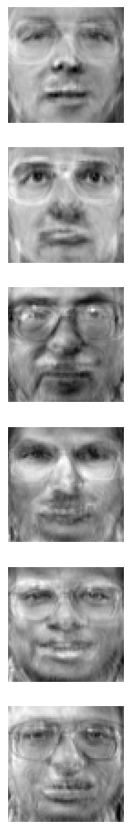

In [25]:
#Use the model to generate some new faces (using the sample() method), and visualize them (use the inverse_transform() method to transform the data back to its original space based on the PCA method used)
data_sample, target_sample = gmm.sample(10)

#plot sample faces
dataset_face_sample = pca.inverse_transform(data_sample)

def plot_faces(data):
    fig, ax = plt.subplots(6, 1, figsize=(15, 15),
                           subplot_kw=dict(xticks=[], yticks=[]))
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(64, 64), cmap='gray')
        

plot_faces(dataset_face_sample)

Text(0.5, 1.0, 'Original Face')

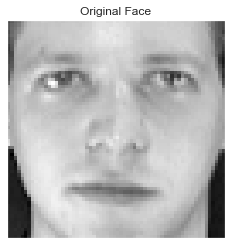

In [26]:
#Modify some images (e.g., rotate, flip, darken).
orig_face_img = dataset.images[0]

fig, ax = plt.subplots(1,1)
ax.imshow(orig_face_img, cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Original Face')

Text(0.5, 1.0, 'Rotated Face')

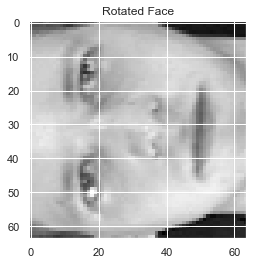

In [27]:
#Rotate
rotated_face_img = ndimage.rotate(orig_face_img, 90, mode = 'mirror')
plt.imshow(rotated_face_img, cmap="gray")
plt.title('Rotated Face')

Text(0.5, 1.0, 'Flipped Face')

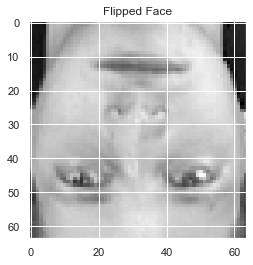

In [28]:
#Flip
flipped_face_img = ndimage.rotate(orig_face_img, 180, mode = 'mirror')
plt.imshow(flipped_face_img, cmap="gray")
plt.title('Flipped Face')

Text(0.5, 1.0, 'hot Face')

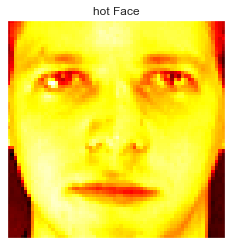

In [29]:
#hotface
hot_face_img = dataset.images[0]
fig, ax = plt.subplots(1,1)
ax.imshow(hot_face_img, cmap="hot")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('hot Face')

Text(0.5, 1.0, 'transparent Face')

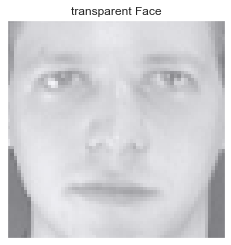

In [30]:
#transparentface
transparent_face_img = dataset.images[0]
fig, ax = plt.subplots(1,1)
ax.imshow(transparent_face_img,alpha=0.5,  cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('transparent Face')

True
Scores for Original Image are :  [292.11813991 292.21919683 292.15072221 292.26991815 292.28066229
 292.207498   292.31370291 292.31328078 292.12374304 292.02582447
 330.90371861 330.90959953 330.90728439 292.00639486 330.9028684
 330.90200475 330.90180093 330.90200447 330.90241189 330.90293764
 330.90349238 330.90239075 292.05668051 292.20408106 292.23513826
 292.24825334 292.20114278 292.14183941 292.2200427  292.2266252
 292.22405653 292.17494128 292.29007761 292.3255038  292.11360827
 292.06145954 292.01235374 292.00388146 343.24110717 343.24712212
 343.26291752 343.27103015 343.27228492 343.26679493 343.26738764
 343.25836432 343.24576641 343.24090357 363.69679501 363.696949
 363.69704402 363.69685751 337.37960194 337.39116266 337.39909038
 337.39941797 337.40639237 337.41070891 337.4089527  337.40055486
 337.39823492 337.40132054 337.39444124 337.38113817]
Threshold of Original Face is :  292.01169825992025
Minimum score 292.0038814566183
Maximum score 363.69704401922576


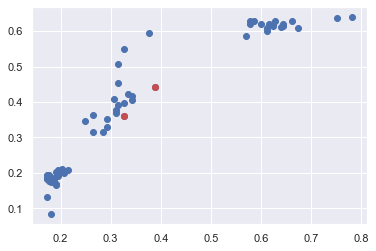

In [31]:
#Determine if the model can detect the anomalies produced in (8) by comparing the output of the score_samples() method for normal images and for anomalies).
#Sample Score of Original Image
gmm_new = GaussianMixture(5, covariance_type='full', random_state=10)
gmm_new.fit(orig_face_img)
print(gmm_new.converged_)

orig_img_scores = gmm_new.score_samples(orig_face_img)
print("Scores for Original Image are : ", orig_img_scores)

#Check Threshold for Original image
threshold_orig_img = quantile(orig_img_scores, .03)
print("Threshold of Original Face is : ", threshold_orig_img)

#minimumscore 
print("Minimum score",orig_img_scores.min())
#maxscore
print ("Maximum score",orig_img_scores.max())

# finding samples with the scores that are equal to or lower than threshold value
index = where(orig_img_scores <= threshold_orig_img)
values = images[0][index]

#ploting by highlighting the anomalies with a color.
plt.scatter(images[0][:,0], images[0][:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()


True
Scores for Rotated Image are :  [363.24193115 363.24194751 353.09142196 353.0916668  353.09151163
 306.58177275 306.58397389 273.23524874 273.39822744 273.29654583
 273.31080793 273.39198144 273.39961312 273.31452073 273.29786211
 273.31004383 273.36066969 273.39813978 273.66848419 273.37193188
 273.48881697 273.48751756 273.2225857  306.58998744 306.60490593
 306.60435771 306.6000623  306.65862118 306.66928615 306.62154331
 306.61159081 306.61014587 306.62212741 306.61261307 306.62806671
 306.64195531 306.65878637 306.66356427 306.62484374 306.60897866
 306.58863333 273.21596582 273.37380065 273.57546703 273.56026556
 273.39632647 273.44902978 273.40565944 273.32158141 273.31821317
 273.25411785 273.29323409 273.2672723  273.27670191 273.36350308
 273.38276784 273.21138844 373.53605196 373.53605196 353.09147577
 353.09149215 353.09135017 363.24195361 363.24195488]
Threshold of Rotated Face is :  273.22185751569015
Minimum score 273.2113884383298
Maximum score 373.5360519561775


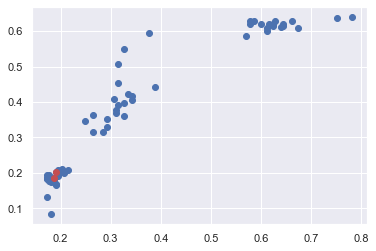

In [32]:
#Sample Score of Rotated Image
gmm_new_1 = GaussianMixture(5, covariance_type='full', random_state=10)
gmm_new_1.fit(rotated_face_img)
print(gmm_new_1.converged_)

rotate_img_scores = gmm_new_1.score_samples(rotated_face_img)
print("Scores for Rotated Image are : ", rotate_img_scores)

#Check Threshold for Rotated image
threshold_rotate_img = quantile(rotate_img_scores, .03)
print("Threshold of Rotated Face is : ", threshold_rotate_img)

#minimumscore 
print("Minimum score",rotate_img_scores.min())
#maxscore
print ("Maximum score",rotate_img_scores.max())

# finding samples with the scores that are equal to or lower than threshold value

index = where(rotate_img_scores <= threshold_rotate_img)
values = images[0][index]

#ploting by highlighting the anomalies with a color.

plt.scatter(images[0][:,0], images[0][:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()



True
Scores for Flipped Image are :  [337.38113817 337.39444124 337.40132054 337.39823492 337.40055486
 337.4089527  337.41070891 337.40639237 337.39941797 337.39909038
 337.39116266 337.37960194 347.63986576 347.64139993 347.642567
 347.64358059 347.6439536  347.64597145 347.64400098 347.64046813
 319.57903833 319.6298394  319.64438977 319.62378634 319.58499239
 319.56932307 317.95309849 317.95663351 317.97505577 317.99314655
 318.0696269  318.05233597 318.01317047 318.03498364 318.03188191
 318.03062997 318.00354025 318.02914044 318.05188648 318.03744278
 318.02979033 318.01636132 317.9945038  317.95849247 339.45804432
 339.45826855 339.45832471 339.45830351 339.45839023 339.45861348
 319.56769402 339.4617402  339.46336651 339.45949602 319.57479249
 319.61670732 319.66759581 319.66661247 319.61524674 319.6078276
 319.60558161 319.59932069 319.63804302 319.60037191]
Threshold of Flipped Face is :  317.95828798530846
Minimum score 317.9530984948666
Maximum score 347.64597144909595


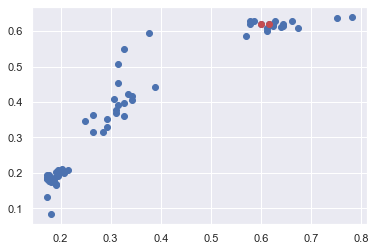

In [33]:
#Sample Score of Flipped Image
gmm_new_2 = GaussianMixture(5, covariance_type='full', random_state=10)
gmm_new_2.fit(flipped_face_img)
print(gmm_new_2.converged_)

flip_img_scores = gmm_new_2.score_samples(flipped_face_img)
print("Scores for Flipped Image are : ", flip_img_scores)

#Check Threshold for flipped image
threshold_flip_img = quantile(flip_img_scores, .03)
print("Threshold of Flipped Face is : ", threshold_flip_img)

#minimumscore 
print("Minimum score",flip_img_scores.min())
#maxscore
print ("Maximum score",flip_img_scores.max())

# finding samples with the scores that are equal to or lower than threshold value
index = where(flip_img_scores <= threshold_flip_img)
values = images[0][index]

#ploting by highlighting the anomalies with a color.
plt.scatter(images[0][:,0], images[0][:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()